# SAM installing

In [2]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\pc\appdata\local\temp\pip-req-build-l_zagstb
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
Using legacy 'setup.py install' for segment-anything, since package 'wheel' is not installed.
    Running setup.py install for segment-anything: started
    Running setup.py install for segment-anything: finished with status 'done'


  Running command git clone -q https://github.com/facebookresearch/segment-anything.git 'C:\Users\PC\AppData\Local\Temp\pip-req-build-l_zagstb'
You should consider upgrading via the 'C:\Users\PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Model Checkpoint

In [1]:
from segment_anything import sam_model_registry

sam_checkpoint = r"C:\Internship\ITMO ML\CTCI\checkpoints\sam_checkpoints\sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

# Inference

## Example Image

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread(r'C:\Internship\ITMO ML\CTCI\data\frame-0.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

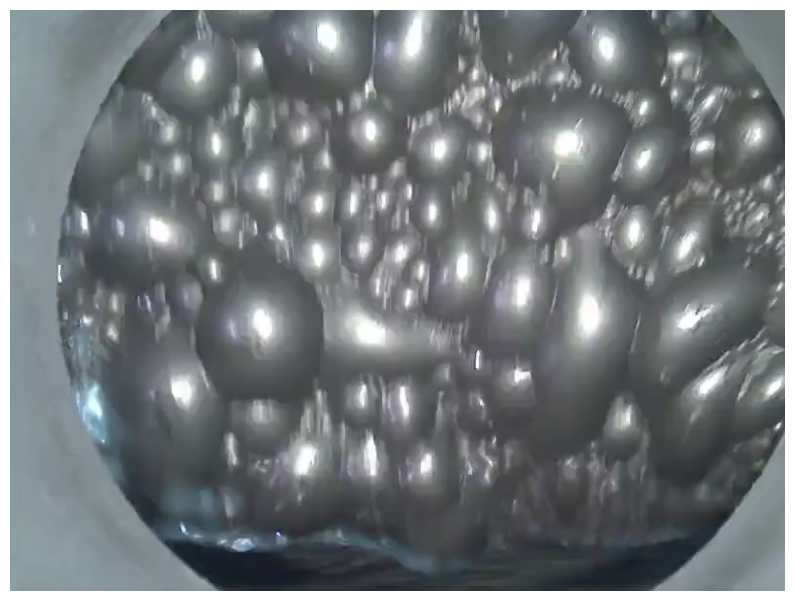

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
from segment_anything import SamAutomaticMaskGenerator, SamPredictor

device = "cuda"
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_batch=32
)

In [6]:
masks = mask_generator.generate(image)

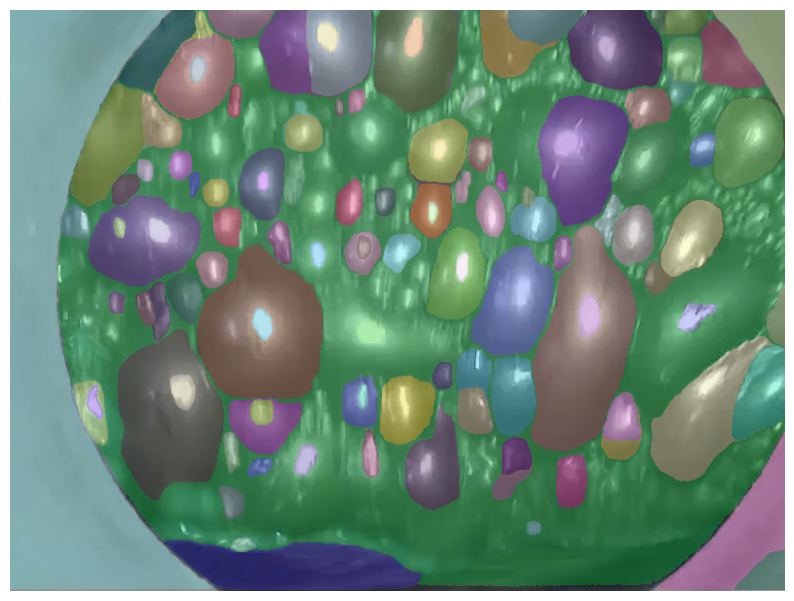

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

# Automatic Generator settings

In [8]:
def show_anns(anns, ax):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
settings = {
    "min_mask_region_area": [10, 50, 100, 500, 1000],
    "points_per_side": [32, 48, 64, 80, 96],
    "stability_score_thresh": [0.95, 0.975, 0.9875, 0.995, 1],
    "crop_n_layers": [0, 1, 2, 3, 4, 5]
}

In [ ]:
fig, ax = plt.subplots(
        nrows=1,
        ncols=5,
        figsize=(45, 9)
)

for i, min_mask_region_area in enumerate(settings["min_mask_region_area"]):
    mask_generator = SamAutomaticMaskGenerator(
        model = sam,
        min_mask_region_area=min_mask_region_area
    )
    
    masks = mask_generator.generate(image)
    
    ax[i].set_title(f"min_mask_region_area={min_mask_region_area}")
    ax[i].imshow(image)
    show_anns(masks, ax[i])
    ax[i].axis('off')
    

In [ ]:
fig, ax = plt.subplots(
        nrows=1,
        ncols=5,
        figsize=(45, 9)
)

for i, points_per_side in enumerate(settings["points_per_side"]):
    mask_generator = SamAutomaticMaskGenerator(
        model = sam,
        points_per_side=points_per_side
    )
    
    masks = mask_generator.generate(image)
    
    ax[i].set_title(f"points_per_side={points_per_side}")
    ax[i].imshow(image)
    show_anns(masks, ax[i])
    ax[i].axis('off')

In [ ]:
fig, ax = plt.subplots(
        nrows=1,
        ncols=5,
        figsize=(45, 9)
)

for i, stability_score_thresh in enumerate(settings["stability_score_thresh"]):
    mask_generator = SamAutomaticMaskGenerator(
        model = sam,
        stability_score_thresh=stability_score_thresh
    )
    
    masks = mask_generator.generate(image)
    
    ax[i].set_title(f"stability_score_thresh={stability_score_thresh}")
    ax[i].imshow(image)
    show_anns(masks, ax[i])
    ax[i].axis('off')

In [ ]:
fig, ax = plt.subplots(
        nrows=1,
        ncols=5,
        figsize=(45, 9)
)

for i, crop_n_layers in enumerate(settings["crop_n_layers"]):
    mask_generator = SamAutomaticMaskGenerator(
        model = sam,
        crop_n_layers=crop_n_layers
    )
    
    masks = mask_generator.generate(image)
    
    ax[i].set_title(f"crop_n_layers={crop_n_layers}")
    ax[i].imshow(image)
    show_anns(masks, ax[i])
    ax[i].axis('off')